In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
csv1 = "movie_data/movies.csv"
csv2 = "movie_data/ratings.csv"
csv3 = "movie_data/genome-scores.csv"
csv4 = "movie_data/genome-tags.csv"
csv5 = "movie_data/links.csv"
csv6 = "movie_data/tags.csv"

In [3]:
movies_df = pd.read_csv(csv1)
ratings_df = pd.read_csv(csv2)
genome_scores_df = pd.read_csv(csv3)
genome_tags_df = pd.read_csv(csv4)
links_df = pd.read_csv(csv5)
tags_df = pd.read_csv(csv6)

In [4]:
print(f'{len(movies_df)} movies')
print(f'{len(ratings_df)} ratings')

62423 movies
25000095 ratings


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
# # Number of ratings for each userId
# ratings_df.groupby(ratings_df['userId'])['rating'].count()

In [7]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [8]:
relevant_genome_scores_df = genome_scores_df.loc[genome_scores_df['relevance'] > .85]

In [9]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [10]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [12]:
new_df = ratings_df.merge(movies_df, how="inner")
new_df = new_df.drop(columns=['title', 'genres', 'timestamp'])
new_df.head()

,userId,movieId,rating
0,1,296,5.0
1,3,296,5.0
2,4,296,4.0
3,5,296,4.0
4,7,296,4.0


In [13]:
new_df["rating"] = np.where(new_df["rating"] >= 3.5, 1, 0)

In [14]:
X = new_df.drop('rating', axis=1)
y = new_df['rating']

In [15]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state=1)

[1 1 1 ... 1 1 1]


In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6251565127406717
Testing Data Score: 0.625341598688261


In [17]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
movie_ratings = movies_df.merge(ratings_df, how="inner")
movie_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


In [223]:
reduced = movie_ratings.sample(1000000)
reduced['year'] = reduced.title.str.extract('\((.*)\)')[0]

reduced['release_year'] = reduced['year'].str.split('(').str[-1]
reduced = reduced.drop(columns = ['year'])
reduced.head()

,movieId,title,genres,userId,rating,timestamp,release_year
18322247,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,53771,5.0,1469383849,2004
19981414,44022,Ice Age 2: The Meltdown (2006),Adventure|Animation|Children|Comedy,128127,4.0,1294518834,2006
12465234,2924,Drunken Master (Jui kuen) (1978),Action|Comedy,151638,4.0,1094192055,1978
10946108,2401,Pale Rider (1985),Western,158338,3.0,1039190740,1985
16934294,5867,Thief (1981),Crime|Drama|Thriller,136733,5.0,1158864992,1981


In [93]:
genres = ['Comedy','Adventure','Animation','Children','Fantasy','Romance','Drama',
          'Documentary','Action','Horror','Mystery','Sci-Fi','Western','Crime','Thriller',
          'Film-Noir','Musical','War']
print(len(genres))

18


In [95]:
def genre_ratings(genre):
    df = reduced[reduced['genres'].str.contains(genre, regex=False)]
    return df

In [96]:
genre_ratings('Film-Noir')

,movieId,title,genres,userId,rating,timestamp,release_year
8564962,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,106362,4.0,1304098488,1997
11957762,2726,"Killing, The (1956)",Crime|Film-Noir,100354,4.0,1516597496,1956
15765557,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,115102,3.0,1466894870,2001
19457672,32587,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller,51622,4.5,1498303273,2005
7016189,1248,Touch of Evil (1958),Crime|Film-Noir|Thriller,461,5.0,938834428,1958
...,...,...,...,...,...,...,...
6105606,1179,"Grifters, The (1990)",Crime|Drama|Film-Noir,15938,5.0,944902959,1990
19470554,32587,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller,144761,5.0,1385243811,2005
9032182,1748,Dark City (1998),Adventure|Film-Noir|Sci-Fi|Thriller,83203,1.0,939118318,1998
18005478,7013,"Night of the Hunter, The (1955)",Drama|Film-Noir|Thriller,131102,4.0,1312497372,1955


In [97]:
genre_averages = {
    'Genre': [],
    'Average Rating': []
}
for genre in genres:
    avg_rating = genre_ratings(genre)['rating'].mean()
    genre_averages['Genre'].append(genre)
    genre_averages['Average Rating'].append(avg_rating)

genre_avg_df = pd.DataFrame(genre_averages).sort_values('Average Rating', ascending=False)

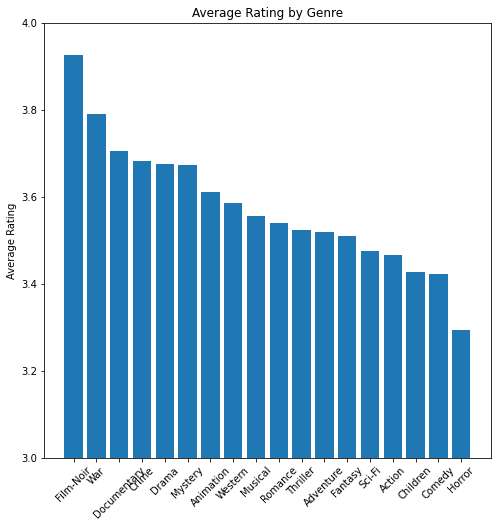

In [98]:
plt.figure(figsize=(8, 8))
plt.bar(genre_avg_df['Genre'],genre_avg_df['Average Rating'])
plt.ylim(3, 4)
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.savefig('images/avg_rating_by_genre.png')

In [99]:
def ratings_by_year(genre, year):
    df = reduced[reduced['genres'].str.contains(genre, regex=False)]
    year_df = df.loc[df['release_year'] == year]
    avg_rating = year_df.groupby('release_year')['rating'].mean()
    return avg_rating[0]

In [100]:
ratings_by_year('Action','1995')

3.2714708785784796

In [101]:
ratings_dict = {
    'Year': [],
    'Average Rating': []
}

years = ['1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006',
         '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

for year in years:
    avg = ratings_by_year('Action',year)
    ratings_dict['Average Rating'].append(avg)
    ratings_dict['Year'].append(year)
    
ratings_dict_df = pd.DataFrame(ratings_dict)

In [102]:
ratings_dict_df.head()

,Year,Average Rating
0,1993,3.317433
1,1994,3.345397
2,1995,3.271471
3,1996,3.245902
4,1997,3.245755


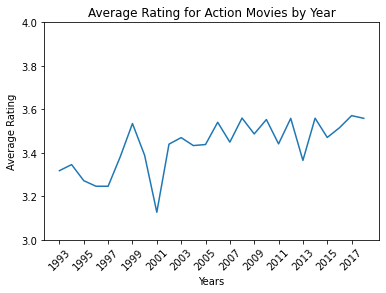

In [103]:
plt.plot(ratings_dict_df['Year'],ratings_dict_df['Average Rating'])
plt.ylim(3, 4)
plt.title('Average Rating for Action Movies by Year')
plt.ylabel('Average Rating')
plt.xlabel('Years')

#every other year for xticks
labels = [n for n in ratings_dict_df['Year']][::2]
plt.xticks(labels,labels=labels,rotation=45)
plt.savefig('images/average_rating_action.png')

In [104]:
# years string to make a list of strings from 1960 - 2018
# years = ['19'+str(i) for i in range(60, 100)] + ['200'+str(i) for i in range(0,10)] + ['20'+str(i) for i in range(10,19)]
# print(years)

In [105]:
def plot_genre_by_year(genre):
    lower_genre = genre.lower()
    ratings_dict = {
        'Year': [],
        'Average Rating': []
    }

    years = ['19'+str(i) for i in range(60, 100)]+['200'+str(i) for i in range(0,10)]+['20'+str(i) for i in range(10,19)]

    year_labels = years[::4]

    for year in years:
        try:
            avg = ratings_by_year(genre,year)
            ratings_dict['Average Rating'].append(avg)
            ratings_dict['Year'].append(year)
        except:
            pass

    ratings_dict_df = pd.DataFrame(ratings_dict)

    ## Plot
    plt.plot(ratings_dict_df['Year'],ratings_dict_df['Average Rating'], label=genre)
    plt.ylim(3, 5)
    plt.title(f'Average Rating for {genre} Movies by Year')
    plt.ylabel('Average Rating')
    plt.xlabel('Years')
    plt.xticks(year_labels,labels=year_labels,rotation=45)
#     plt.legend(loc="lower left")
    plt.savefig(f'images/avg_rating_by_year_{lower_genre}.png')
    plt.show()

In [106]:
def plot_genre_by_year_single_plot(genre):
    lower_genre = genre.lower()
    ratings_dict = {
        'Year': [],
        'Average Rating': []
    }

    years = ['19'+str(i) for i in range(60, 100)]+['200'+str(i) for i in range(0,10)]+['20'+str(i) for i in range(10,19)]

    year_labels = years[::4]

    for year in years:
        try:
            avg = ratings_by_year(genre,year)
            ratings_dict['Average Rating'].append(avg)
            ratings_dict['Year'].append(year)
        except:
            pass

    ratings_dict_df = pd.DataFrame(ratings_dict)

    ## Plot
    plt.plot(ratings_dict_df['Year'],ratings_dict_df['Average Rating'], label=genre)
    plt.ylim(3, 5)
    plt.title(f'Average Rating for all Genres by Year')
    plt.ylabel('Average Rating')
    plt.xlabel('Years')
    plt.xticks(year_labels,labels=year_labels,rotation=45)
    plt.legend(loc="upper right")
    plt.savefig(f'images/all_genre.png')
plt.show()

In [107]:
top_genres = ['War','Documentary','Crime','Drama','Mystery','Animation','Action']
# top_genres = ['War']

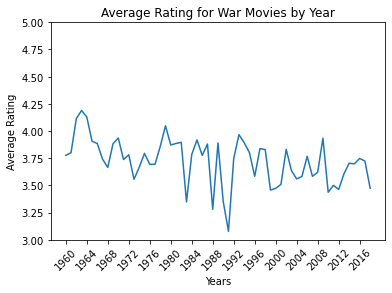

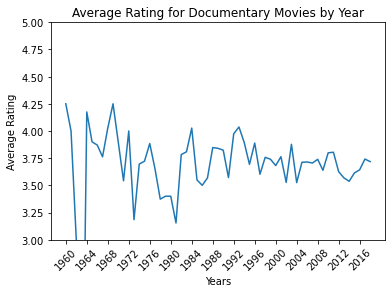

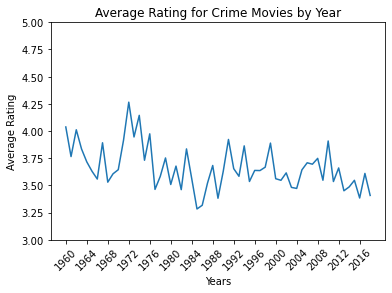

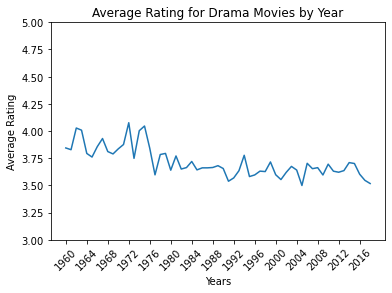

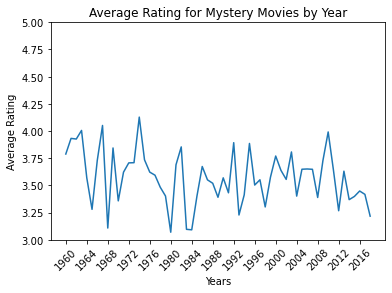

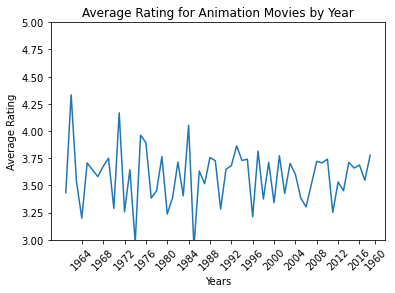

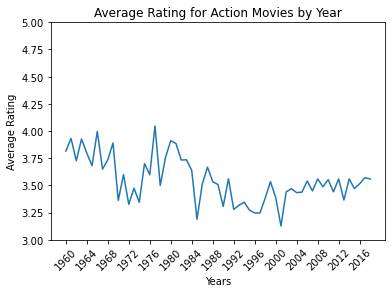

In [108]:
for genre in top_genres:
    plot_genre_by_year(genre)

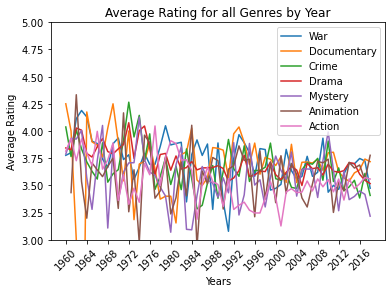

In [109]:
for genre in top_genres:
    plot_genre_by_year_single_plot(genre)

In [110]:
# top_movies = ratings_df[ratings_df['rating'] >= 4.5]
# top_movies = top_movies.merge(movies_df, how='left')
# top_movies.head()

In [111]:
ratings_df.timestamp

0           1147880044
1           1147868817
2           1147868828
3           1147878820
4           1147868510
               ...    
25000090    1240953372
25000091    1240951998
25000092    1240950697
25000093    1240953434
25000094    1240952515
Name: timestamp, Length: 25000095, dtype: int64

In [112]:
ratings_df['reviewDate'] = pd.to_datetime(ratings_df.timestamp, unit='s')

In [122]:
ratings_df['reviewYear'] = ratings_df.reviewDate.dt.year

In [123]:
# Getting date range, 1995-2019
ratings_df.sort_values('reviewDate').head()

,userId,movieId,rating,timestamp,reviewDate,reviewYear
326761,2262,21,3.0,789652009,1995-01-09 11:46:49,1995
326810,2262,1079,3.0,789652009,1995-01-09 11:46:49,1995
326767,2262,47,5.0,789652009,1995-01-09 11:46:49,1995
15845015,102689,1,4.0,822873600,1996-01-29 00:00:00,1996
15845023,102689,39,5.0,822873600,1996-01-29 00:00:00,1996


In [174]:
# movies_df.loc[movies_df.title.str.contains('Pulp')]

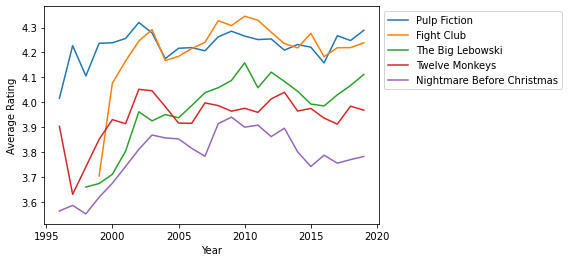

In [175]:
# Searching for cult classics to track ratings since release
# movieName, movieId
cult_classics = [['Pulp Fiction', 296], ['Fight Club', 2959], ['The Big Lebowski', 1732], 
                 ['Twelve Monkeys', 32], ['Nightmare Before Christmas', 551]]

for i, k in cult_classics:
    plt.plot(ratings_df.loc[ratings_df.movieId == k].groupby('reviewYear')['rating'].mean(), label=i)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.savefig(f'images/cult_classics.png')

In [228]:
reduced = movie_ratings.sample(1000000)
reduced['year'] = reduced.title.str.extract('\((.*)\)')[0]

reduced['release_year'] = reduced['year'].str.split('(').str[-1]
reduced = reduced.drop(columns = ['year'])
reduced.head()

,movieId,title,genres,userId,rating,timestamp,release_year
9043049,1754,Fallen (1998),Crime|Drama|Fantasy|Thriller,16092,3.0,992229194,1998
23125209,96079,Skyfall (2012),Action|Adventure|Thriller|IMAX,115469,4.0,1542927813,2012
5052916,904,Rear Window (1954),Mystery|Thriller,72228,4.0,1276852358,1954
13204883,3198,Papillon (1973),Crime|Drama,127760,4.0,1007419721,1973
19905555,41569,King Kong (2005),Action|Adventure|Drama|Fantasy|Thriller,10199,3.5,1206713189,2005


In [231]:
# cleaning release_year stringed data to convert to int
reduced = reduced[reduced['release_year'].str.contains('2006–2007')==False]
reduced = reduced[reduced['release_year'].str.contains('Close Relations')==False]
reduced = reduced[reduced['release_year'].str.contains('1983\)')==False]
reduced = reduced[reduced['release_year'].str.contains('Your Past Is Showing')==False]

reduced['reviewDate'] = pd.to_datetime(reduced.timestamp, unit='s')
reduced['reviewYear'] = reduced.reviewDate.dt.year

In [232]:
reduced.release_year = pd.to_numeric(reduced.release_year)

In [233]:
print(len(reduced))

999512


In [234]:
reduced.head()

,movieId,title,genres,userId,rating,timestamp,release_year,reviewDate,reviewYear
9043049,1754,Fallen (1998),Crime|Drama|Fantasy|Thriller,16092,3.0,992229194,1998,2001-06-11 03:13:14,2001
23125209,96079,Skyfall (2012),Action|Adventure|Thriller|IMAX,115469,4.0,1542927813,2012,2018-11-22 23:03:33,2018
5052916,904,Rear Window (1954),Mystery|Thriller,72228,4.0,1276852358,1954,2010-06-18 09:12:38,2010
13204883,3198,Papillon (1973),Crime|Drama,127760,4.0,1007419721,1973,2001-12-03 22:48:41,2001
19905555,41569,King Kong (2005),Action|Adventure|Drama|Fantasy|Thriller,10199,3.5,1206713189,2005,2008-03-28 14:06:29,2008


In [235]:
def ratings_by_review_year(genre, year):
    df = reduced[reduced['genres'].str.contains(genre, regex=False)]
    year_df = df.loc[(df.reviewYear >= year) & (df.release_year >= year)]
    avg_rating = year_df.groupby('reviewYear')['rating'].mean()
    return avg_rating

In [236]:
def plot_review_by_year(genres, year):
    titles = []
    for genre in genres:
        df = reduced[reduced['genres'].str.contains(genre, regex=False)]
        year_df = df.loc[df.reviewYear >= year]
        avg_rating = year_df.groupby('reviewYear')['rating'].mean()
        
        plt.plot(avg_rating, label=genre)
        plt.ylim(3.0,4.5)
        plt.xlabel("Year of Review")
        plt.ylabel("Average Rating")
        plt.xticks(range(year,2019)[::4])
        plt.legend(loc="upper right")
        titles.append(genre)
    plt.title(f'Movies by Review Year')
    plt.savefig(f'images/by_review_year/{titles[0]}-{titles[1]}')
    plt.show()

In [237]:
genres

['Comedy',
 'Adventure',
 'Animation',
 'Children',
 'Fantasy',
 'Romance',
 'Drama',
 'Documentary',
 'Action',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Western',
 'Crime',
 'Thriller',
 'Film-Noir',
 'Musical',
 'War']

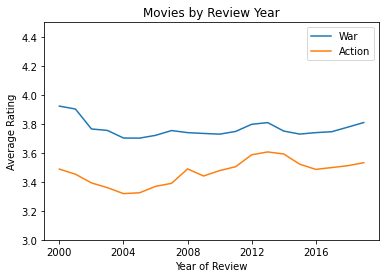

In [238]:
plot_review_by_year(['War','Action'], 2000)

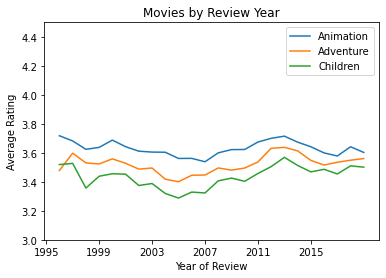

In [239]:
plot_review_by_year(['Animation','Adventure','Children'],1995)

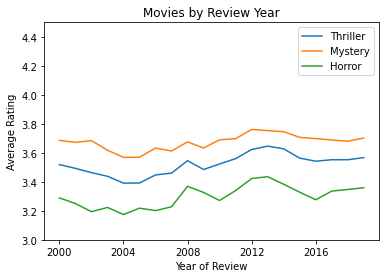

In [240]:
plot_review_by_year(['Thriller','Mystery','Horror'],2000)